# K-Nearest Neighbors - KNN - Algorithm
## Importação de bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Gerando base de dados artificial

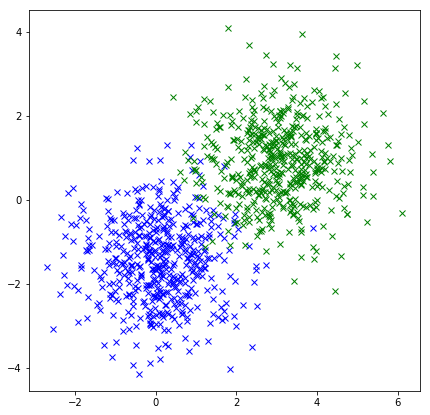

In [2]:
plt.rcParams['figure.figsize'] = [7, 7]

# geração das amostras 1
mean1 = [0, -1.5]        # média da amostra 1
cov1 = [[1, 0], [0, 1]]  # covariância da amostra 1

x1, y1 = np.random.multivariate_normal(mean1, cov1, 500).T

# geração das amostras 2
mean2 = [3, 1]           # média da amostra 2
cov2 = [[1, 0], [0, 1]]  # covariância da amostra 2

x2, y2 = np.random.multivariate_normal(mean2, cov2, 500).T

plt.plot(x1, y1, 'xb', x2, y2, 'xg')
plt.show()

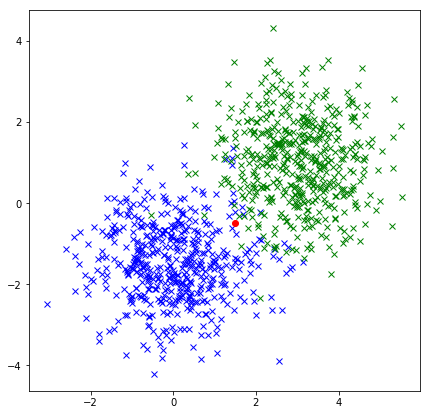

In [10]:
x3 = 1.5
y3 = -.5

plt.plot(x1, y1, 'xb', x2, y2, 'xg', x3, y3, 'or')
plt.show()

# Exemplo de aplicação
## Importando a base de dados

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)  

## Dados

In [4]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Pré-processamento

In [5]:
Sample = dataset.iloc[:, :-1].values
Target = dataset.iloc[:, 4].values

# print(Sample)

## Dividindo entre treinamento e teste

In [6]:
Sample_train, Sample_test, Target_train, Target_test = train_test_split(Sample, Target, test_size=0.20)  # Alterar a proporção entre treinamento e testes ]0;1[ 

## Normalizando os dados

In [7]:
scaler = StandardScaler()  
scaler.fit(Sample_train)

Sample_train = scaler.transform(Sample_train)
Sample_test = scaler.transform(Sample_test)

## Treinamento

In [8]:
classifier = KNeighborsClassifier(n_neighbors=5) # Alterar número de vizinhos.
classifier.fit(Sample_train, Target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

## Execução

In [9]:
Target_pred = classifier.predict(Sample_test)

## Avaliando o resultado

In [10]:
print(confusion_matrix(Target_test, Target_pred))  

# Relatório de desempenho[2]
print(classification_report(Target_test, Target_pred))  

[[12  0  0]
 [ 0 10  0]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         8

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Variando o valor de K

In [11]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Sample_train, Target_train)
    pred_i = knn.predict(Sample_test)
    error.append(np.mean(pred_i != Target_test))

Text(0, 0.5, 'Mean Error')

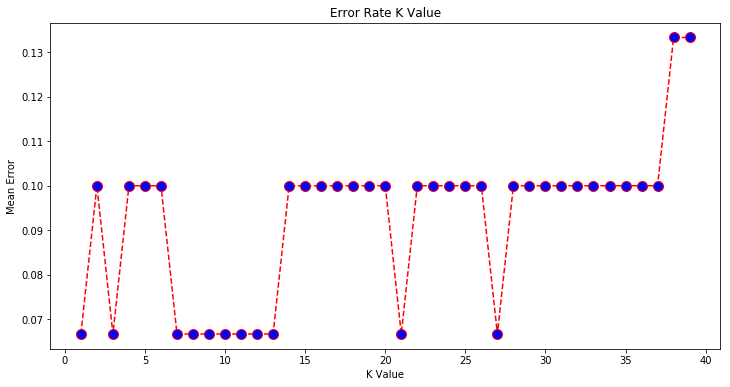

In [62]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

## Referências

https://en.wikipedia.org/wiki/Minkowski_distance

Para entender o relatório de desempenho e a matriz de confusão:
https://skymind.ai/wiki/accuracy-precision-recall-f1


UC Irvine Machine Learning Repository:
http://archive.ics.uci.edu/ml/



$

c = \sqrt{a^2 + b^2}

$

# 